<div class="alert alert-block alert-success">
    <b>L1 and L2 Regularizer:</b>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles, make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X = StandardScaler().fit_transform(X)
X_tensor = torch.FloatTensor(X)
y_tensor = torch.LongTensor(y)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


def train(model, X, y, optimizer, criterion, epochs=1000, l2_lambda=0):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)

        # Add l2 regularization
        if l2_lambda > 0:
            l2_reg = torch.tensor(0.)
            for param in model.parameters():
                l2_reg += torch.norm(param, 2)
            loss += l2_lambda * l2_reg

        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

# Train without L2
model_without_l2 = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_without_l2.parameters(), lr=0.01)
train(model_without_l2, X_tensor, y_tensor, optimizer, criterion)    

Epoch 0, Loss: 0.6761612296104431
Epoch 100, Loss: 0.00036588506191037595
Epoch 200, Loss: 0.00017763927462510765
Epoch 300, Loss: 0.00010012708662543446
Epoch 400, Loss: 6.251670129131526e-05
Epoch 500, Loss: 4.242182694724761e-05
Epoch 600, Loss: 3.0314065952552482e-05
Epoch 700, Loss: 2.2511190763907507e-05
Epoch 800, Loss: 1.7275944628636353e-05
Epoch 900, Loss: 1.3620477147924248e-05


In [2]:
# Train with L2
model_with_l2 = Net()
optimizer = optim.Adam(model_with_l2.parameters(), lr=0.01)
train(model_with_l2, X_tensor, y_tensor, optimizer, criterion, l2_lambda=0.01)

Epoch 0, Loss: 0.8770818114280701
Epoch 100, Loss: 0.13820168375968933
Epoch 200, Loss: 0.12551867961883545
Epoch 300, Loss: 0.12488099932670593
Epoch 400, Loss: 0.12481540441513062
Epoch 500, Loss: 0.1247897818684578
Epoch 600, Loss: 0.12478664517402649
Epoch 700, Loss: 0.12476985156536102
Epoch 800, Loss: 0.1247815266251564
Epoch 900, Loss: 0.12476585060358047


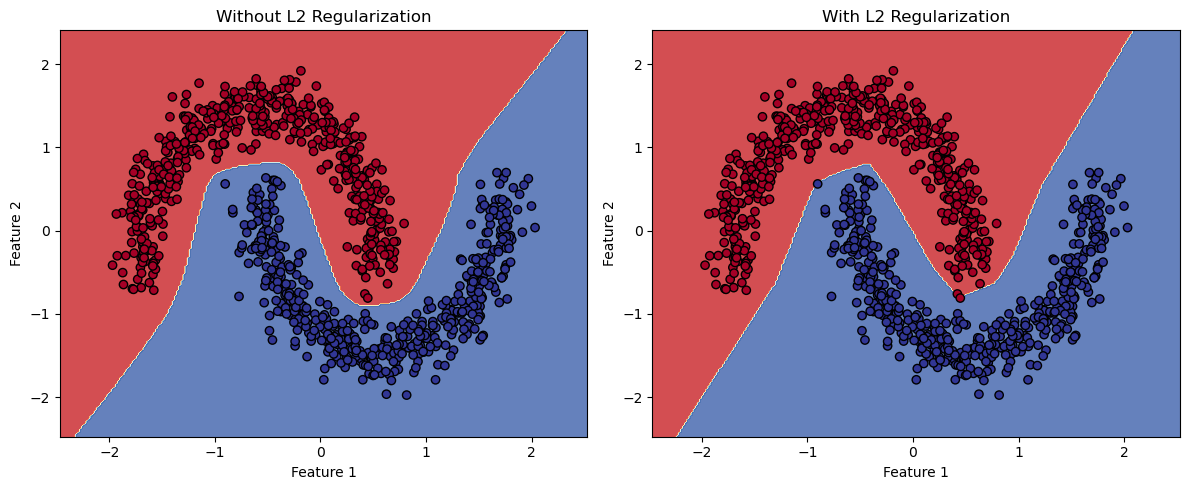

In [3]:
# Plotting function
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])).detach().numpy()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot decision boundaries
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_decision_boundary(X, y, model_without_l2, 'Without L2 Regularization')
plt.subplot(122)
plot_decision_boundary(X, y, model_with_l2, 'With L2 Regularization')
plt.tight_layout()
plt.show()

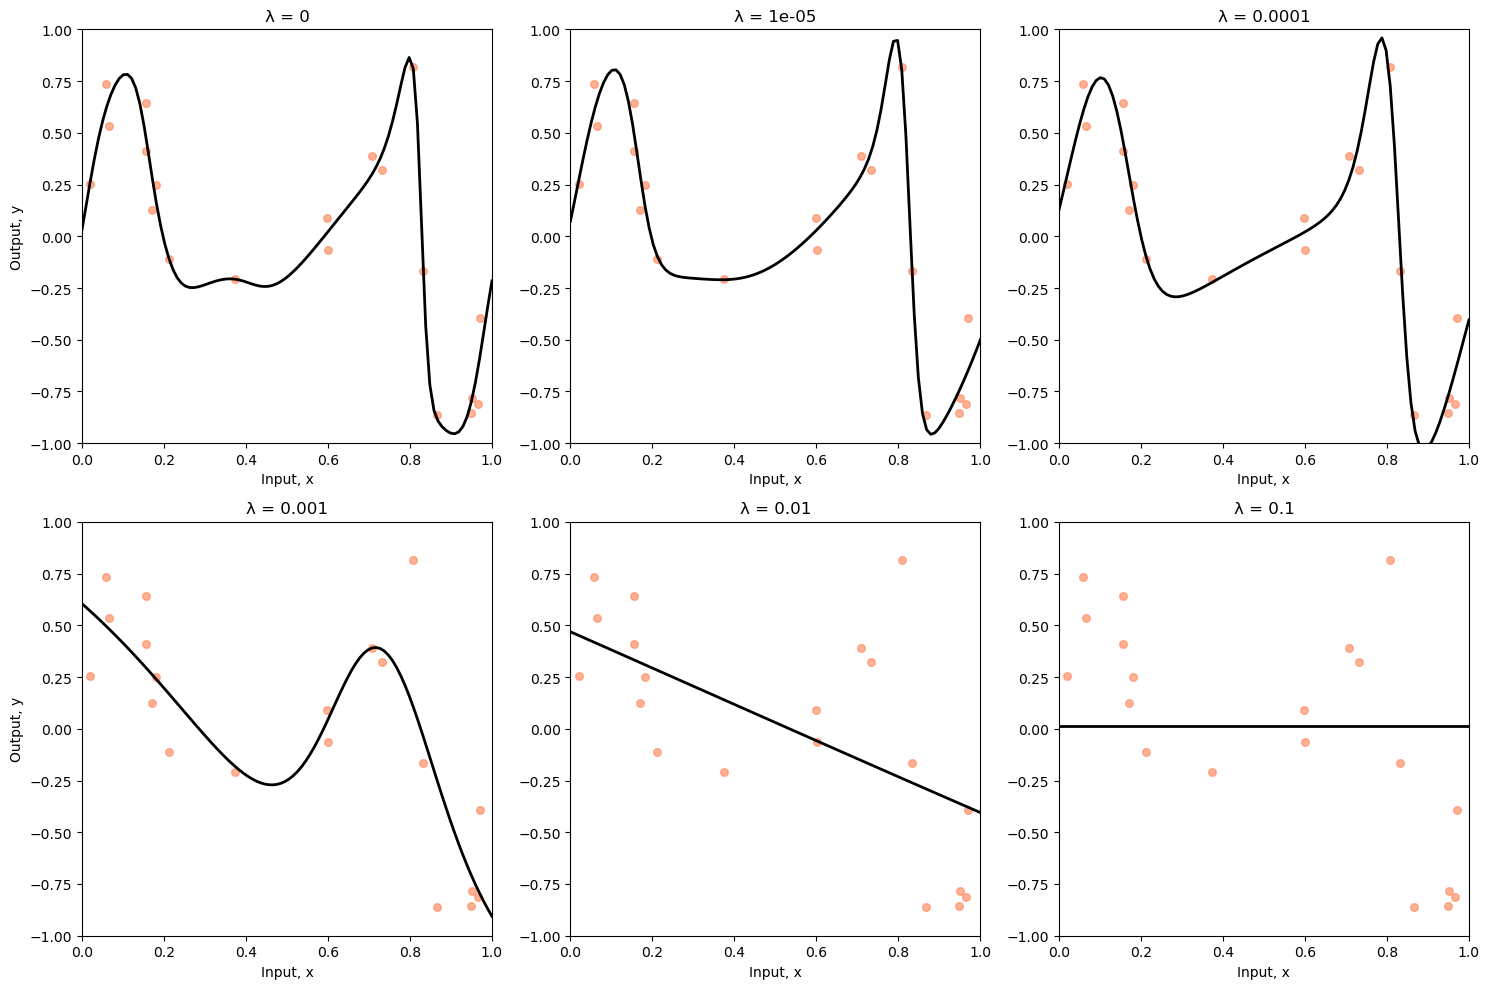

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim


np.random.seed(42)

x_close = np.random.uniform(0, 1, 15)
y_close = 0.5 * np.sin(4 * np.pi * x_close) + 0.5 * np.sin(6 * np.pi * x_close) + np.random.normal(0, 0.1, 15)


x_far = np.random.uniform(0, 1, 5)
y_far = 0.5 * np.sin(4 * np.pi * x_far) + 0.5 * np.sin(6 * np.pi * x_far) + np.random.normal(0, 0.5, 5)


x = np.concatenate([x_close, x_far])
y = np.concatenate([y_close, y_far])


x_tensor = torch.FloatTensor(x).view(-1, 1)
y_tensor = torch.FloatTensor(y).view(-1, 1)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# Training function
def train(model, x, y, optimizer, criterion, epochs=1000, l2_lambda=0):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)

        if l2_lambda > 0:
            l2_reg = sum(param.pow(2.0).sum() for param in model.parameters())
            loss += l2_lambda * l2_reg

        loss.backward()
        optimizer.step()

# Function to plot results
def plot_results(ax, x, y, model, lambda_val):
    x_cont = torch.linspace(0, 1, 100).view(-1, 1)
    y_pred = model(x_cont).detach().numpy()


    ax.scatter(x, y, color='coral', alpha=0.6, s=30)
    ax.plot(x_cont, y_pred, color='black', linewidth=2)
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, 1)
    ax.set_title(f'λ = {lambda_val}')
    ax.set_xlabel('Input, x')
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel('Output, y')

lambda_values = [0, 1e-5, 0.0001, 0.001, 0.01, 0.1]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, l2_lambda in enumerate(lambda_values):
    model = Net()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    train(model, x_tensor, y_tensor, optimizer, criterion, l2_lambda=l2_lambda)
    plot_results(axs[i], x, y, model, l2_lambda)

plt.tight_layout()
plt.show()